# Shape Model

Class counts before filtering: shape
Oval                 3557
Cushion              2618
Round                2119
Emerald Cut          1205
Pear                  997
Radiant               552
Asscher - Octagon     533
Trillion              287
Heart                 266
Fancy                 238
Princess               96
Marquise               83
Name: count, dtype: int64
Classes with only one sample: Index([], dtype='object', name='shape')
Class counts after resampling: shape
Princess             3557
Pear                 3557
Cushion              3557
Heart                3557
Asscher - Octagon    3557
Fancy                3557
Marquise             3557
Radiant              3557
Emerald Cut          3557
Trillion             3557
Round                3557
Oval                 3557
Name: count, dtype: int64
Found 34147 validated image filenames belonging to 12 classes.
Found 8537 validated image filenames belonging to 12 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 1438s 1s/step - accuracy: 0.2525 - loss: 2.1401 - val_accuracy: 0.6341 - val_loss: 1.1783 - learning_rate: 0.0010
Epoch 2/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 1391s 1s/step - accuracy: 0.5788 - loss: 1.2931 - val_accuracy: 0.7397 - val_loss: 0.8783 - learning_rate: 0.0010
Epoch 3/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 1384s 1s/step - accuracy: 0.6743 - loss: 1.0638 - val_accuracy: 0.7682 - val_loss: 0.8277 - learning_rate: 0.0010
Epoch 4/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 1381s 1s/step - accuracy: 0.7153 - loss: 0.9668 - val_accuracy: 0.7671 - val_loss: 0.7934 - learning_rate: 0.0010
Epoch 5/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 1381s 1s/step - accuracy: 0.7389 - loss: 0.9061 - val_accuracy: 0.8122 - val_loss: 0.7032 - learning_rate: 0.0010
Epoch 6/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 1373s 1s/step - accuracy: 0.7539 - loss: 0.8732 - val_accuracy: 0.8072 - val_loss: 0.6983 - learning_rate: 0.0010
Epoch 7/30
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 1400s 1s/step - accura

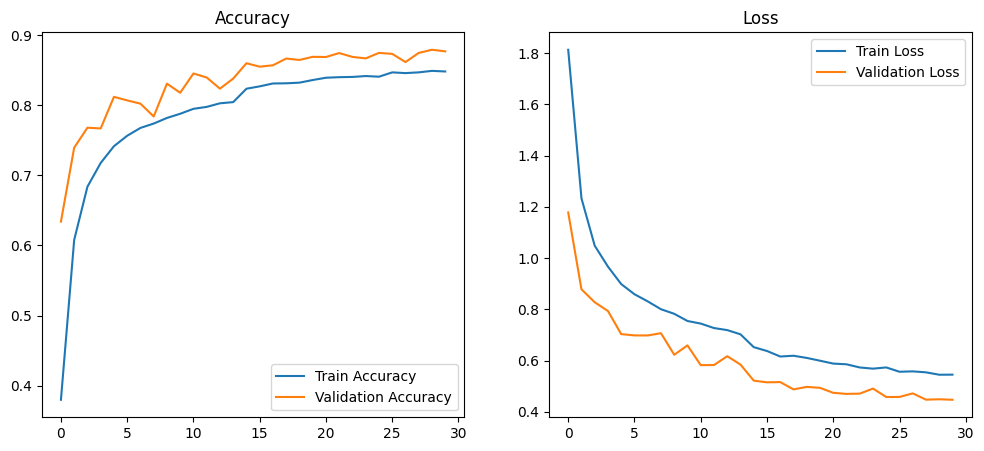

Found 8537 validated image filenames belonging to 12 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


267/267 ━━━━━━━━━━━━━━━━━━━━ 148s 552ms/step


                   precision    recall  f1-score   support

Asscher - Octagon       0.80      0.90      0.84       711
          Cushion       0.83      0.86      0.84       711
      Emerald Cut       0.90      0.76      0.82       711
            Fancy       0.96      0.85      0.90       712
            Heart       0.97      0.93      0.95       712
         Marquise       0.99      0.96      0.97       711
             Oval       0.72      0.79      0.76       712
             Pear       0.90      0.91      0.91       712
         Princess       0.97      0.96      0.97       711
          Radiant       0.87      0.85      0.86       711
            Round       0.76      0.87      0.81       711
         Trillion       0.95      0.89      0.92       712

         accuracy                           0.88      8537
        macro avg       0.88      0.88      0.88      8537
     weighted avg       0.88      0.88      0.88      8537



In [2]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# ==========================
# ✅ Define Paths
# ==========================
csv_path = "/content/final all colors drop cut , clarity  drop color intensity.csv"  # Update with your CSV path
image_base_path = "/content/drive/MyDrive/Reupload_Images/"  # Folder containing images

# ==========================
# ✅ Load Dataset
# ==========================
df = pd.read_csv(csv_path)

# Convert image paths to absolute paths
df['Image id'] = df['Image id'].apply(lambda x: os.path.join(image_base_path, x))

# Ensure target variable is a string
df['shape'] = df['shape'].astype(str)

# ==========================
# ✅ Check for classes with only one sample
# ==========================
class_counts = df['shape'].value_counts()
print("Class counts before filtering:", class_counts)

# Identify classes with only one sample
classes_with_one_sample = class_counts[class_counts == 1].index
print("Classes with only one sample:", classes_with_one_sample)

# Remove rows with classes having only one sample
df_filtered = df[~df['shape'].isin(classes_with_one_sample)]

# ==========================
# ✅ Oversample Minority Classes
# ==========================
X = df_filtered['Image id'].values.reshape(-1, 1)
y = df_filtered['shape'].values

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.DataFrame({'Image id': X_resampled.flatten(), 'shape': y_resampled})

print("Class counts after resampling:", df_resampled['shape'].value_counts())

# ==========================
# ✅ Train-Validation Split
# ==========================
train_df, val_df = train_test_split(df_resampled, test_size=0.2, random_state=42, stratify=df_resampled['shape'])

# ==========================
# ✅ Define Augmentation
# ==========================
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# ✅ Define different augmentation settings for minority classes
minority_classes = class_counts[class_counts < 50].index.tolist()

minority_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

def get_datagen(label):
    return minority_datagen if label in minority_classes else datagen

# ==========================
# ✅ Image Data Generators
# ==========================
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image id",
    y_col="shape",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="shape",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# ==========================
# ✅ Define CNN Model
# ==========================
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(df['shape'].unique()), activation='softmax')
])

# ==========================
# ✅ Compile Model
# ==========================
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ==========================
# ✅ Define Callbacks
# ==========================
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# ==========================
# ✅ Train Model
# ==========================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

# ==========================
# ✅ Plot Accuracy & Loss
# ==========================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

# ==========================
# ✅ Test Set Classification Report
# ==========================
test_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="shape",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)

report = classification_report(true_labels, pred_labels, target_names=class_labels)
print(report)

# ✅ Save the entire model (architecture + weights)
model.save('shape_classification_model.h5')



# Model Testing Code

In [39]:
import tensorflow as tf
import numpy as np
import cv2
import os

# ==========================
# ✅ Define Model Path & Load Model
# ==========================
model_path = "/content/shape_classification_model.h5"  # Update path if necessary
model = tf.keras.models.load_model(model_path)

# ==========================
# ✅ Define Preprocessing Function (Same as Training)
# ==========================
def preprocess_image(image_path):
    """Loads and preprocesses an image for model prediction."""
    img = cv2.imread(image_path)  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (128, 128))  # Resize to match training input size
    img = img / 255.0  # Rescale pixel values (same as training)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# ==========================
# ✅ Define Input Image Path
# ==========================
image_path = "/content/Green Sapphire 287.jpg"  # Replace with the image path

# ==========================
# ✅ Preprocess Input Image
# ==========================
preprocessed_img = preprocess_image(image_path)

# ==========================
# ✅ Make Prediction
# ==========================
pred_probs = model.predict(preprocessed_img)
pred_label_index = np.argmax(pred_probs)  # Get class index

# ==========================
# ✅ Get Class Labels
# ==========================
# Mapping indices back to labels (assuming same order as training)
class_labels = ["Asscher - Octagon", "Cushion", "Emerald Cut", "Fancy", "Heart",
                "Marquise", "Oval", "Pear", "Princess", "Radiant", "Round", "Trillion"]  # Replace with actual class names

predicted_class = class_labels[pred_label_index]
confidence = pred_probs[0][pred_label_index] * 100  # Confidence percentage

# ==========================
# ✅ Display Prediction Result
# ==========================
print(f"Predicted Shape: {predicted_class} (Confidence: {confidence:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted Shape: Oval (Confidence: 72.72%)
